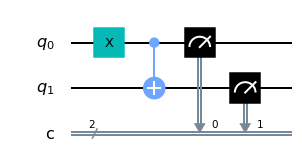

In [1]:
import qiskit as quan
%matplotlib inline

myCircuit = quan.QuantumCircuit(2, 2) # denotes two qubits, and two bits
#qubits:0,0
myCircuit.x(0) #negate the 0 qubit
#qubits:1,0
myCircuit.cx(0, 1) #cx() is cont not and flips the second qubit based on the 0 qubit
#qubits:1,1
myCircuit.measure([0, 1], [0, 1])
myCircuit.draw()
myCircuit.draw(output="mpl")

In [7]:
from qiskit import IBMQ
IBMQ.save_account("private information that you arent allowed to see, sorry folks")
IBMQ.load_account()

configrc.store_credentials:WARNING:2020-08-14 01:13:14,862: Credentials already present. Set overwrite=True to overwrite.
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [9]:
provider=IBMQ.get_provider("ibm-q")

for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().qubits)
    except:
        qubit_count = "simulated"
    print(f"{backend.name()} has {backend.status().pending_jobs} queued and {qubit_count} qubits ")

ibmq_qasm_simulator has 0 queued and simulated qubits 
ibmqx2 has 1 queued and 5 qubits 
ibmq_16_melbourne has 21 queued and 15 qubits 
ibmq_vigo has 4 queued and 5 qubits 
ibmq_ourense has 3 queued and 5 qubits 
ibmq_valencia has 6 queued and 5 qubits 
ibmq_london has 4 queued and 5 qubits 
ibmq_burlington has 1 queued and 5 qubits 
ibmq_essex has 0 queued and 5 qubits 
ibmq_armonk has 31 queued and 1 qubits 
ibmq_santiago has 5 queued and 5 qubits 


In [10]:
from qiskit.tools.monitor import job_monitor

backend = provider.get_backend("ibmqx2")
job = quan.execute(myCircuit, backend=backend, shots=300)
job_monitor(job)

Job Status: job has successfully run


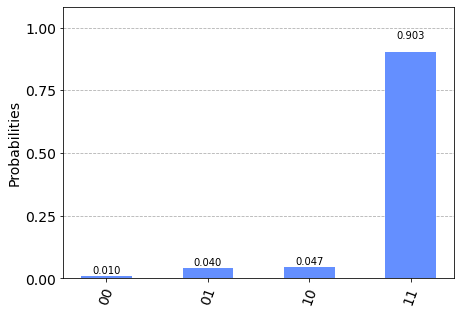

In [11]:
from qiskit.visualization import plot_histogram

result = job.result()
counts = result.get_counts(myCircuit)

plot_histogram([counts])